In [88]:
from Neuraline.Utilities.data import DataTable, DataExploration
from Neuraline.Utilities.chart import Chart
data_table, data_exploration, chart = DataTable(), DataExploration(), Chart()
url_path = './VALE3 Dados Históricos.csv'
data_table.visualization_csv_inline(url_path=url_path, limit=10)
y_training, _, y_test, _ = data_exploration.dataSeparationCSV(url_path=url_path, list_inputs=['Último'], training_percentage=.5, test_percentage=.5)
print(f'y_training: {len(y_training)} - y_test: {len(y_test)}')

╒════════════════════╤══════════╤════════════╤══════════╤══════════╤════════╤════════╕
│ ﻿Data              │   Último │   Abertura │   Máxima │   Mínima │ Vol.   │ Var%   │
╞════════════════════╪══════════╪════════════╪══════════╪══════════╪════════╪════════╡
│ 19 de ago. de 2022 │    66.96 │      67    │    67.44 │    66.48 │ 45.54M │ -1.12% │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼────────┼────────┤
│ 18 de ago. de 2022 │    67.72 │      68.3  │    68.61 │    67.71 │ 27.44M │ -0.75% │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼────────┼────────┤
│ 17 de ago. de 2022 │    68.23 │      68.31 │    68.79 │    67.9  │ 29.01M │ -2.46% │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼────────┼────────┤
│ 16 de ago. de 2022 │    69.95 │      69.5  │    70.35 │    69.11 │ 22.26M │ 2.42%  │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼────────┼────────┤
│ 15 de ago. de 2022 │    68.3  │      68  

<h4>Mínimos Quadrados (na Predição)</h4>

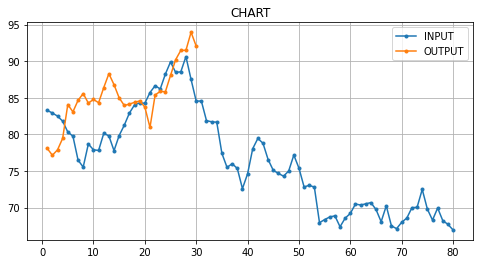

In [90]:
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.least_squares import LeastSquares
least_squares = LeastSquares()

least_squares.fit(
    inputs=y_training,
    nonlinear=True # True para resultados não lineares
)
result = least_squares.predict(predictions=30)
chart.plotMATRIX(matrix1=y_test, matrix2=result)

<h4>Mínimos Quadrados (na Tendência)</h4>

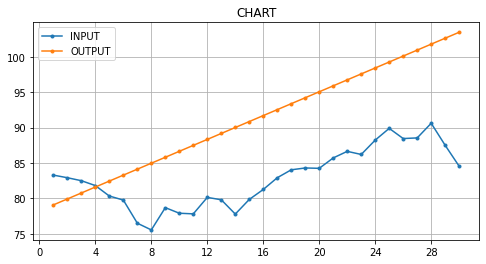

In [92]:
from Neuraline.ArtificialIntelligence.MachineLearning.SupervisedLearning.regression import Regression
regression = Regression()

predictions = 30
regression.fit(inputs=y_training, regression_type='least_squares', nonlinear=False)
result = regression.predict(inputs=y_training[:predictions])
chart.plotMATRIX(matrix1=y_test[:predictions], matrix2=result)

<h4>Ajuste Exponencial</h4>

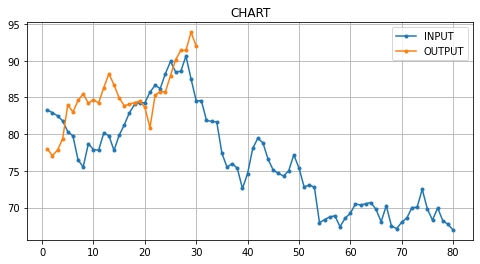

In [96]:
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.exponential_adjustment import ExponentialAdjustment
exponential_adjustment = ExponentialAdjustment()

exponential_adjustment.fit(
    inputs=y_training,
    alpha=0, # percentual referente ao nível de desvio para o horizontal
    order=1, # ordem do expoente
)
result = exponential_adjustment.predict(predictions=30)
chart.plotMATRIX(matrix1=y_test, matrix2=result)

<h4>Média Movel</h4>

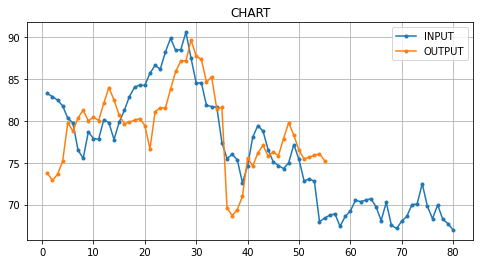

In [98]:
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.moving_average import MovingAverage
moving_average = MovingAverage()

moving_average.fit(
    inputs=y_training,
    type_avg='sma', # tipo de cálculo para a média móvel
    adjust=True, # se True ajustará os dados do treinamento para tentar melhorar a predição
    periods=35, # número de períodos
    dynamic_periods=False, # se True selecionará automaticamente os melhores períodos
    preprocessor='standardization' # padronização dos dados na mesma escala numérica
)
result = moving_average.predict(predictions=55)
chart.plotMATRIX(matrix1=y_test, matrix2=result)